#  **Movie Data Exploration**
#### Author: Titilayo Amuwo

## Overview 

This project analyze different types of movie titles that is currently doing the best at the box office and how it relates to Profit.

## Business Problem

Microsoft sees all the big companies creating original video content and wanted to get in on the fun. They have decided to create a new movie studio, but they don't know anything about creating movies. I need to explore what types of films are currently doing the best at the box office, and then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to make a decision. Below I will analyze the data given to understand different movies and their ratings and it's relationship to profits.


## Data Understanding

Let's import the libraries we may need for our analysis and import the dataframes as well.

In [461]:
#importing tools needed to work on data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

In [462]:
!ls zippedData/

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
cleaned_movies_title_df.csv  movies_ranked_df.csv
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [463]:
#read the movie datas.
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
tn_movie = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
imdb_ratings = pd.read_csv ('zippedData/imdb.title.ratings.csv.gz')

Now that we have read the files we need, let's preview the info of each data frames to know the columns and datatype.

In [464]:
# retrieving the infomation of Bom to get the data type.
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [465]:
# retrieving the info of imdb basics to get the data type.
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [466]:
tn_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [467]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Let' look at the shape of the data to get the size of the index and columns.

In [468]:
bom.shape, imdb_basics.shape ,tn_movie.shape, imdb_ratings.shape

((3387, 5), (146144, 6), (5782, 6), (73856, 3))

Here, let's look at the statistics summary of each data before cleaning the data

In [469]:
#using the describe method to generate summary statistics of the 
#numerical data of Bom movies.

bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [470]:
imdb_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [471]:
tn_movie.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [472]:
imdb_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [473]:
#getting the label of the columns in order to combine / merge.
bom.columns, imdb_basics.columns ,tn_movie.columns, imdb_ratings.columns

(Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 Index(['tconst', 'primary_title', 'original_title', 'start_year',
        'runtime_minutes', 'genres'],
       dtype='object'),
 Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
        'worldwide_gross'],
       dtype='object'),
 Index(['tconst', 'averagerating', 'numvotes'], dtype='object'))

In [474]:
#getting the first 10 rows of the Bom movies dataframe.
bom.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


It is always a good practice to check the duplicate of each dataset before merging and after merging.

In [475]:
#Check duplicate for bom movie dataframe
bom.duplicated(subset=['title','year']).sum()

0

In [476]:
#getting the first 10 rows of the imdb basics dataframe.
imdb_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [477]:
#check the duplicate of Imbd basic dataframe
imdb_basics.duplicated(subset=['tconst','primary_title','start_year']).sum()

0

In [478]:
tn_movie.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [479]:
#check the duplicate of tn movies dataframe
tn_movie.duplicated(subset=['movie','release_date']).sum()

0

In [480]:
imdb_ratings.head(10)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [481]:
#checking the duplicate of imdb rating dataframe
imdb_ratings.duplicated(subset='tconst').sum()

0

## Data Preparation and Cleaning


Before working on tn movie I had to remove the dollar sign and also convert it to numerical values because the index was an object and without conversion, I will not be able to work with it as an a float.
After that we are going to be cleaning each data in order to generate the samples for our analysis.

In [482]:
#Remove dollar signs from worldwide_gross column
tn_movie['worldwide_gross']=tn_movie['worldwide_gross'].replace({'\$':'',',':''},regex = True)

In [483]:
#convert the index to numerical values
tn_movie['worldwide_gross']=pd.to_numeric(tn_movie['worldwide_gross'],errors='coerce')

In [484]:
#Remove dollar signs from production_budget column
tn_movie['production_budget']=tn_movie['production_budget'].replace({'\$':'',',':''},regex=True)

In [485]:
tn_movie['production_budget']=pd.to_numeric(tn_movie['production_budget'],errors='coerce')

In [486]:
##Remove dollar signs from domestic_gross column
tn_movie['domestic_gross']=tn_movie['domestic_gross'].replace({'\$':'',',':''},regex=True)

In [487]:
#convert the index to numerical values
tn_movie['domestic_gross']=pd.to_numeric(tn_movie['domestic_gross'],errors='coerce')

In [488]:
#split the movie release date by year and create a new column for year.
tn_movie['year']= tn_movie['release_date'].map(lambda x: x[7:])
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [489]:
tn_movie.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018
5778,79,"Apr 2, 1999",Following,6000,48482,240495,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,2015
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041,2005


In [490]:
#Drop the columns that I will not use for my analysis.
tn_df =tn_movie.drop(labels=['release_date','worldwide_gross','id'], axis = 1)


In [491]:
#rename movie column to title for uniformity
tn_df=tn_df.rename(columns = {'movie':'title'})


In [492]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   domestic_gross     5782 non-null   int64 
 3   year               5782 non-null   object
dtypes: int64(2), object(2)
memory usage: 180.8+ KB


In [493]:
#drop the foreign_grosss column
bom_df = bom.drop('foreign_gross',axis = 1)
bom_df

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [494]:
#convert year from int to str
bom_df['year'] = bom_df['year'].astype(str)
bom_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [495]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   domestic_gross     5782 non-null   int64 
 3   year               5782 non-null   object
dtypes: int64(2), object(2)
memory usage: 180.8+ KB


In [496]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   year            3387 non-null   object 
dtypes: float64(1), object(3)
memory usage: 106.0+ KB


In [497]:
#merge bom and tn_movies on 'title' and 'year' columns.
bom_and_tn_df = bom_df.merge(tn_df, how='outer', on =['title','year','domestic_gross'])
bom_and_tn_df

,title,studio,domestic_gross,year,production_budget
0,Toy Story 3,BV,415000000.0,2010,NaN
1,Alice in Wonderland (2010),BV,334200000.0,2010,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,NaN
3,Inception,WB,292600000.0,2010,NaN
4,Shrek Forever After,P/DW,238700000.0,2010,NaN
...,...,...,...,...,...
9164,Red 11,NaN,0.0,2018,7000.0
9165,Following,NaN,48482.0,1999,6000.0
9166,Return to the Land of Wonders,NaN,1338.0,2005,5000.0
9167,A Plague So Pleasant,NaN,0.0,2015,1400.0


In [498]:
bom_and_tn_df.duplicated(subset=['title','year']).sum()

318

In [499]:
bom_and_tn_df.drop_duplicates(subset= ['title','year'])


,title,studio,domestic_gross,year,production_budget
0,Toy Story 3,BV,415000000.0,2010,NaN
1,Alice in Wonderland (2010),BV,334200000.0,2010,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,NaN
3,Inception,WB,292600000.0,2010,NaN
4,Shrek Forever After,P/DW,238700000.0,2010,NaN
...,...,...,...,...,...
9164,Red 11,NaN,0.0,2018,7000.0
9165,Following,NaN,48482.0,1999,6000.0
9166,Return to the Land of Wonders,NaN,1338.0,2005,5000.0
9167,A Plague So Pleasant,NaN,0.0,2015,1400.0


In [500]:
bom_and_tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9169 entries, 0 to 9168
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9169 non-null   object 
 1   studio             3382 non-null   object 
 2   domestic_gross     9141 non-null   float64
 3   year               9169 non-null   object 
 4   production_budget  5782 non-null   float64
dtypes: float64(2), object(3)
memory usage: 429.8+ KB


In [501]:
imdb_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [502]:
#drop original_title column
imdb_basics_df = imdb_basics.drop('original_title',axis = 1)
imdb_basics_df

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,NaN


In [503]:
#Rename the columns so i can merge with imdb ratings dataframe.
imdb_basics_df = imdb_basics_df.rename(columns = {'primary_title':'title','start_year':'year'})
imdb_basics_df

,tconst,title,year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,NaN


In [504]:
imdb_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   title            146144 non-null  object 
 2   year             146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [505]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [506]:
imdb_df = imdb_basics_df.merge(imdb_ratings, on ='tconst')
imdb_df

,tconst,title,year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [507]:
imdb_df.duplicated(subset= 'tconst').sum()

0

In [508]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   title            73856 non-null  object 
 2   year             73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [509]:
imdb_df.rename(columns = {"tconst": "id"})

,id,title,year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [510]:
#Change the 'year' datatype from int to string.
imdb_df['year']=imdb_df['year'].astype(str)

In [511]:
bom_and_tn_df

,title,studio,domestic_gross,year,production_budget
0,Toy Story 3,BV,415000000.0,2010,NaN
1,Alice in Wonderland (2010),BV,334200000.0,2010,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,NaN
3,Inception,WB,292600000.0,2010,NaN
4,Shrek Forever After,P/DW,238700000.0,2010,NaN
...,...,...,...,...,...
9164,Red 11,NaN,0.0,2018,7000.0
9165,Following,NaN,48482.0,1999,6000.0
9166,Return to the Land of Wonders,NaN,1338.0,2005,5000.0
9167,A Plague So Pleasant,NaN,0.0,2015,1400.0


In [512]:
#Using the .merge() method to combine Bom movies with imbd movies. 
#create a new variable name for the combined movies
movies_title_df = bom_and_tn_df.merge(imdb_df, on = ['title','year'])
movies_title_df

,title,studio,domestic_gross,year,production_budget,tconst,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,2010,NaN,tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,2010,NaN,tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,2010,NaN,tt0892791,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,NaN,tt1325004,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,2010,NaN,tt1228705,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...
2231,Heroes of Dirt,NaN,0.0,2015,175000.0,tt1934172,98.0,"Action,Drama,Sport",6.7,81
2232,Aroused,NaN,0.0,2013,150000.0,tt2403815,66.0,Documentary,5.3,596
2233,The Dirties,NaN,0.0,2013,55000.0,tt2334896,83.0,"Crime,Drama",6.8,5728
2234,Exeter,NaN,0.0,2015,25000.0,tt1945044,91.0,"Horror,Mystery,Thriller",4.5,5156


In [513]:
movies_title_df.duplicated().sum()

0

In [514]:
movies_title_df.shape

(2236, 10)

In [515]:
movies_title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2235
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2236 non-null   object 
 1   studio             1845 non-null   object 
 2   domestic_gross     2226 non-null   float64
 3   year               2236 non-null   object 
 4   production_budget  389 non-null    float64
 5   tconst             2236 non-null   object 
 6   runtime_minutes    2232 non-null   float64
 7   genres             2234 non-null   object 
 8   averagerating      2236 non-null   float64
 9   numvotes           2236 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 192.2+ KB


## Data Analysis

Here we are going to Analyze the data that we have cleaned and sort it to get the accurate data needed to produce visuals to represent each recommendations.

In [516]:
#Calculating my Profit. 
#Formulae  Profit = Total Revenue - Total Cost
movies_title_df['profit'] = movies_title_df['domestic_gross'] - movies_title_df['production_budget']
movies_title_df

,title,studio,domestic_gross,year,production_budget,tconst,runtime_minutes,genres,averagerating,numvotes,profit
0,Toy Story 3,BV,415000000.0,2010,NaN,tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,NaN
1,Inception,WB,292600000.0,2010,NaN,tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,NaN
2,Shrek Forever After,P/DW,238700000.0,2010,NaN,tt0892791,93.0,"Adventure,Animation,Comedy",6.3,167532,NaN
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,NaN,tt1325004,124.0,"Adventure,Drama,Fantasy",5.0,211733,NaN
4,Iron Man 2,Par.,312400000.0,2010,NaN,tt1228705,124.0,"Action,Adventure,Sci-Fi",7.0,657690,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2231,Heroes of Dirt,NaN,0.0,2015,175000.0,tt1934172,98.0,"Action,Drama,Sport",6.7,81,-175000.0
2232,Aroused,NaN,0.0,2013,150000.0,tt2403815,66.0,Documentary,5.3,596,-150000.0
2233,The Dirties,NaN,0.0,2013,55000.0,tt2334896,83.0,"Crime,Drama",6.8,5728,-55000.0
2234,Exeter,NaN,0.0,2015,25000.0,tt1945044,91.0,"Horror,Mystery,Thriller",4.5,5156,-25000.0


In [517]:
#Calculating my Return On Investment. 
#Formulae = ROI = Profit / cost * 100
movies_title_df['roi'] = movies_title_df['profit']/movies_title_df['production_budget'] * (100)
movies_title_df

,title,studio,domestic_gross,year,production_budget,tconst,runtime_minutes,genres,averagerating,numvotes,profit,roi
0,Toy Story 3,BV,415000000.0,2010,NaN,tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,NaN,NaN
1,Inception,WB,292600000.0,2010,NaN,tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,NaN,NaN
2,Shrek Forever After,P/DW,238700000.0,2010,NaN,tt0892791,93.0,"Adventure,Animation,Comedy",6.3,167532,NaN,NaN
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,NaN,tt1325004,124.0,"Adventure,Drama,Fantasy",5.0,211733,NaN,NaN
4,Iron Man 2,Par.,312400000.0,2010,NaN,tt1228705,124.0,"Action,Adventure,Sci-Fi",7.0,657690,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2231,Heroes of Dirt,NaN,0.0,2015,175000.0,tt1934172,98.0,"Action,Drama,Sport",6.7,81,-175000.0,-100.0
2232,Aroused,NaN,0.0,2013,150000.0,tt2403815,66.0,Documentary,5.3,596,-150000.0,-100.0
2233,The Dirties,NaN,0.0,2013,55000.0,tt2334896,83.0,"Crime,Drama",6.8,5728,-55000.0,-100.0
2234,Exeter,NaN,0.0,2015,25000.0,tt1945044,91.0,"Horror,Mystery,Thriller",4.5,5156,-25000.0,-100.0


In [518]:
movies_profit_df = movies_title_df.loc[movies_title_df['profit'] > 0]
movies_profit_df

,title,studio,domestic_gross,year,production_budget,tconst,runtime_minutes,genres,averagerating,numvotes,profit,roi
5,Iron Man 2,NaN,312433331.0,2010,170000000.0,tt1228705,124.0,"Action,Adventure,Sci-Fi",7.0,657690,142433331.0,83.784312
8,Despicable Me,NaN,251513985.0,2010,69000000.0,tt1323594,95.0,"Animation,Comedy,Family",7.7,464511,182513985.0,264.513022
15,Black Swan,NaN,106954678.0,2010,13000000.0,tt0947798,108.0,"Drama,Thriller",8.0,648854,93954678.0,722.728292
17,Megamind,NaN,148415853.0,2010,130000000.0,tt1001526,95.0,"Action,Animation,Comedy",7.3,207488,18415853.0,14.166041
32,The Social Network,NaN,96962694.0,2010,40000000.0,tt1285016,120.0,"Biography,Drama",7.7,568578,56962694.0,142.406735
...,...,...,...,...,...,...,...,...,...,...,...,...
2212,Grace Unplugged,NaN,2507159.0,2013,1700000.0,tt2349460,102.0,"Drama,Music",6.2,3006,807159.0,47.479941
2224,Meet the Blacks,NaN,9097072.0,2016,900000.0,tt4191580,94.0,"Comedy,Horror",5.9,34669,8197072.0,910.785778
2225,Kevin Hart: Laugh at My Pain,NaN,7706436.0,2011,750000.0,tt1999192,89.0,"Comedy,Documentary",7.4,5081,6956436.0,927.524800
2226,Columbus,NaN,1017107.0,2017,700000.0,tt5990474,104.0,Drama,7.2,10735,317107.0,45.301000


In [519]:
movies_ranked_df = movies_title_df.sort_values(by=['roi'],ascending=False)
movies_ranked_df

,title,studio,domestic_gross,year,production_budget,tconst,runtime_minutes,genres,averagerating,numvotes,profit,roi
549,The Devil Inside,NaN,53262945.0,2012,1000000.0,tt1560985,83.0,Horror,4.2,33522,52262945.0,5226.294500
799,The Purge,NaN,64473115.0,2013,3000000.0,tt2184339,85.0,"Horror,Thriller",5.7,183549,61473115.0,2049.103833
1867,A Ghost Story,NaN,1594798.0,2017,100000.0,tt6265828,92.0,"Drama,Fantasy,Romance",6.8,46280,1494798.0,1494.798000
980,Annabelle,NaN,84273813.0,2014,6500000.0,tt3322940,99.0,"Horror,Mystery,Thriller",5.4,122039,77773813.0,1196.520200
839,Kevin Hart: Let Me Explain,NaN,32244051.0,2013,2500000.0,tt2609912,75.0,"Comedy,Documentary",6.8,7880,29744051.0,1189.762040
...,...,...,...,...,...,...,...,...,...,...,...,...
2105,Helicopter Eela,Eros,72000.0,2018,NaN,tt8427036,135.0,Drama,5.4,673,NaN,NaN
2106,Girls vs Gangsters,WGUSA,37100.0,2018,NaN,tt7870578,120.0,"Comedy,Drama",3.3,148,NaN,NaN
2107,A Paris Education,KL,21600.0,2018,NaN,tt6593240,137.0,Drama,6.3,371,NaN,NaN
2108,The Quake,Magn.,6200.0,2018,NaN,tt6523720,106.0,"Action,Drama,Thriller",6.2,5270,NaN,NaN


In [520]:
movies_ranked_df

,title,studio,domestic_gross,year,production_budget,tconst,runtime_minutes,genres,averagerating,numvotes,profit,roi
549,The Devil Inside,NaN,53262945.0,2012,1000000.0,tt1560985,83.0,Horror,4.2,33522,52262945.0,5226.294500
799,The Purge,NaN,64473115.0,2013,3000000.0,tt2184339,85.0,"Horror,Thriller",5.7,183549,61473115.0,2049.103833
1867,A Ghost Story,NaN,1594798.0,2017,100000.0,tt6265828,92.0,"Drama,Fantasy,Romance",6.8,46280,1494798.0,1494.798000
980,Annabelle,NaN,84273813.0,2014,6500000.0,tt3322940,99.0,"Horror,Mystery,Thriller",5.4,122039,77773813.0,1196.520200
839,Kevin Hart: Let Me Explain,NaN,32244051.0,2013,2500000.0,tt2609912,75.0,"Comedy,Documentary",6.8,7880,29744051.0,1189.762040
...,...,...,...,...,...,...,...,...,...,...,...,...
2105,Helicopter Eela,Eros,72000.0,2018,NaN,tt8427036,135.0,Drama,5.4,673,NaN,NaN
2106,Girls vs Gangsters,WGUSA,37100.0,2018,NaN,tt7870578,120.0,"Comedy,Drama",3.3,148,NaN,NaN
2107,A Paris Education,KL,21600.0,2018,NaN,tt6593240,137.0,Drama,6.3,371,NaN,NaN
2108,The Quake,Magn.,6200.0,2018,NaN,tt6523720,106.0,"Action,Drama,Thriller",6.2,5270,NaN,NaN


In [521]:
#getting the summary statistics of movies profit dataframe. 
movies_profit_df.describe()

,domestic_gross,production_budget,runtime_minutes,averagerating,numvotes,profit,roi
count,2.070000e+02,2.070000e+02,207.000000,207.000000,2.070000e+02,2.070000e+02,207.000000
mean,1.002225e+08,5.124831e+07,108.048309,6.657005,1.922260e+05,4.897424e+07,215.724228
std,1.097864e+08,6.140446e+07,16.550235,0.905183,2.197955e+05,6.395659e+07,442.150841
min,1.017107e+06,1.000000e+05,75.000000,4.000000,6.000000e+00,2.056160e+05,0.451083
25%,2.988107e+07,1.150000e+07,95.000000,6.050000,3.891350e+04,8.981124e+06,37.151528
50%,5.461190e+07,2.400000e+07,105.000000,6.700000,1.156240e+05,2.505578e+07,104.496136
75%,1.370569e+08,6.100000e+07,118.000000,7.400000,2.858155e+05,5.763658e+07,219.558672
max,6.232795e+08,3.306000e+08,169.000000,8.600000,1.299334e+06,3.982795e+08,5226.294500


In [522]:
movies_profit_df['roi'].describe()

count     207.000000
mean      215.724228
std       442.150841
min         0.451083
25%        37.151528
50%       104.496136
75%       219.558672
max      5226.294500
Name: roi, dtype: float64

In [523]:
movies_profit_df['profit'].describe()

count    2.070000e+02
mean     4.897424e+07
std      6.395659e+07
min      2.056160e+05
25%      8.981124e+06
50%      2.505578e+07
75%      5.763658e+07
max      3.982795e+08
Name: profit, dtype: float64

In [524]:
movies_profit_df.loc[0:35, 'production_budget'].describe()

count    5.000000e+00
mean     8.440000e+07
std      6.463977e+07
min      1.300000e+07
25%      4.000000e+07
50%      6.900000e+07
75%      1.300000e+08
max      1.700000e+08
Name: production_budget, dtype: float64

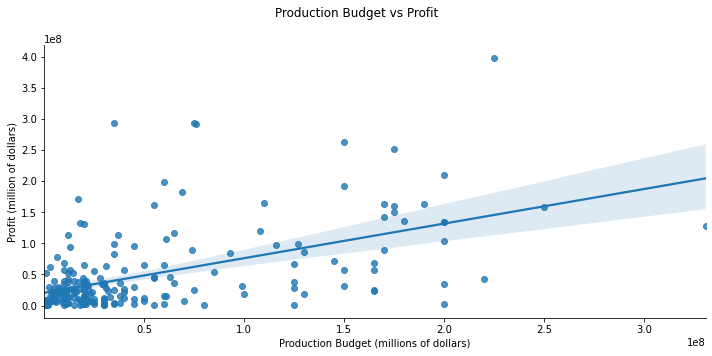

In [525]:
graph=sns.lmplot(x ='production_budget', y='profit',data = movies_profit_df, height = 5,aspect =2)
graph.set_axis_labels(x_var='Production Budget (millions of dollars)', y_var='Profit (million of dollars)')
fig=graph.fig
fig.suptitle('Production Budget vs Profit')
plt.tight_layout()
plt.show()
fig.savefig('ProductionBudgetVSProfit.png')

In [526]:
#Saving my cleaned data
movies_title_df.to_csv('./ZippedData/cleaned_movies_title_df.csv')

In [527]:
#Create a genres Table
movies_title_df['genres'] = movies_title_df['genres'].str.split(',')
movies_title_df = movies_title_df.explode('genres')
movies_title_df

,title,studio,domestic_gross,year,production_budget,tconst,runtime_minutes,genres,averagerating,numvotes,profit,roi
0,Toy Story 3,BV,415000000.0,2010,NaN,tt0435761,103.0,Adventure,8.3,682218,NaN,NaN
0,Toy Story 3,BV,415000000.0,2010,NaN,tt0435761,103.0,Animation,8.3,682218,NaN,NaN
0,Toy Story 3,BV,415000000.0,2010,NaN,tt0435761,103.0,Comedy,8.3,682218,NaN,NaN
1,Inception,WB,292600000.0,2010,NaN,tt1375666,148.0,Action,8.8,1841066,NaN,NaN
1,Inception,WB,292600000.0,2010,NaN,tt1375666,148.0,Adventure,8.8,1841066,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2234,Exeter,NaN,0.0,2015,25000.0,tt1945044,91.0,Mystery,4.5,5156,-25000.0,-100.0
2234,Exeter,NaN,0.0,2015,25000.0,tt1945044,91.0,Thriller,4.5,5156,-25000.0,-100.0
2235,Dutch Kills,NaN,0.0,2015,25000.0,tt2759066,90.0,Crime,5.1,82,-25000.0,-100.0
2235,Dutch Kills,NaN,0.0,2015,25000.0,tt2759066,90.0,Drama,5.1,82,-25000.0,-100.0


In [528]:
#counting each genres by movie titles
movies_genres_df = movies_title_df.groupby('genres',as_index=False)['title'].count().sort_values('title',ascending=False)
movies_genres_df.reset_index(inplace=True)
movies_genres_df

,index,genres,title
0,7,Drama,1146
1,4,Comedy,792
2,0,Action,630
3,1,Adventure,465
4,19,Thriller,354
5,16,Romance,352
6,5,Crime,318
7,3,Biography,221
8,11,Horror,199
9,9,Fantasy,165


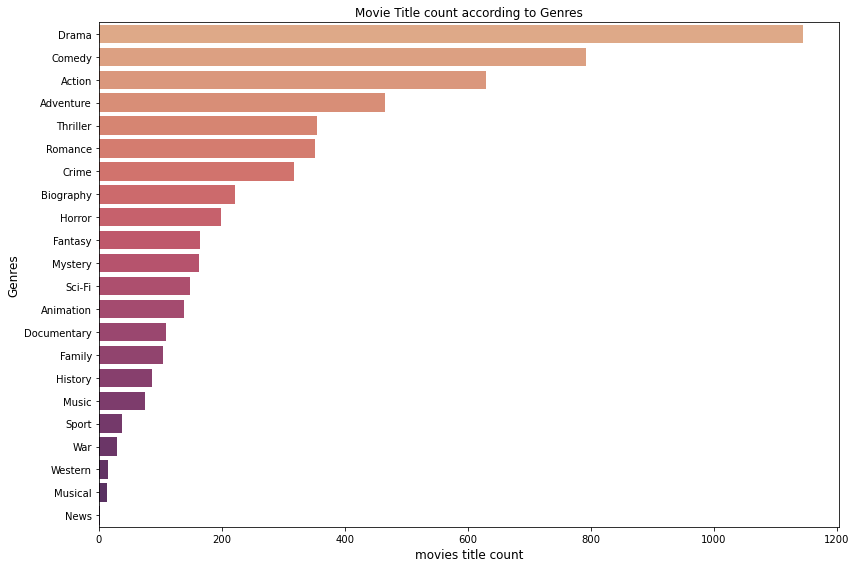

In [529]:
plt.figure(figsize=(12,8))
graph = sns.barplot(x=movies_genres_df['title'], y =movies_genres_df['genres'], palette='flare',)
fig=graph.get_figure()
graph.set_xlabel(xlabel='movies title count', fontsize=12)
graph.set_ylabel(ylabel='Genres', fontsize=12)
graph.set_title('Movie Title count according to Genres')
plt.tight_layout()
plt.show()
fig.savefig('Genres.png');

In [530]:
roi_genres_df=movies_title_df.groupby('genres',as_index=False)[['production_budget','profit','roi',]].agg('median')
roi_genres_df.reset_index(inplace=True)
roi_genres_df

,index,genres,production_budget,profit,roi
0,0,Action,60000000.0,-2000000.0,-10.157111
1,1,Adventure,105500000.0,3605952.0,12.271350
2,2,Animation,75000000.0,28707064.0,31.493344
3,3,Biography,18000000.0,6068926.0,56.865574
4,4,Comedy,22000000.0,5608245.0,21.705542
5,5,Crime,22000000.0,-55000.0,-8.180506
6,6,Documentary,2250000.0,1471547.5,113.321146
7,7,Drama,15000000.0,478094.5,5.875551
8,8,Family,50000000.0,-1950368.0,-5.047100
9,9,Fantasy,42000000.0,1494798.0,17.385498


In [531]:
roi_genres_df = roi_genres_df[roi_genres_df['roi'] > 0]
roi_genres_df

,index,genres,production_budget,profit,roi
1,1,Adventure,105500000.0,3605952.0,12.271350
2,2,Animation,75000000.0,28707064.0,31.493344
3,3,Biography,18000000.0,6068926.0,56.865574
4,4,Comedy,22000000.0,5608245.0,21.705542
6,6,Documentary,2250000.0,1471547.5,113.321146
7,7,Drama,15000000.0,478094.5,5.875551
9,9,Fantasy,42000000.0,1494798.0,17.385498
11,11,Horror,8000000.0,8197072.0,71.709725
12,12,Music,18000000.0,8080225.0,41.334077
13,13,Musical,200000000.0,134191110.0,67.095555


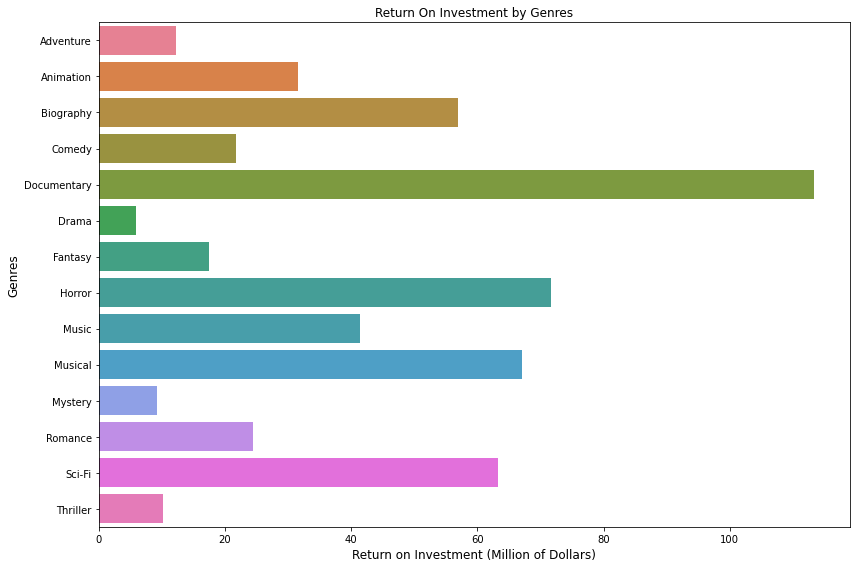

In [532]:
plt.figure(figsize=(12,8))
graph = sns.barplot(x=roi_genres_df['roi'], y =roi_genres_df['genres'], palette='husl',)
fig=graph.get_figure()
graph.set_xlabel(xlabel='Return on Investment (Million of Dollars)', fontsize=12)
graph.set_ylabel(ylabel='Genres', fontsize=12)
graph.set_title('Return On Investment by Genres')
plt.tight_layout()
plt.show()
fig.savefig('Roi.png');

In [533]:
#Group my movietitle dataframe by genres, return on investment and profit
#Use the agg()method to get the maximum value and then sort it by profit
#Then get the the first eleven genres with high profit and ROI
profit_max_df = movies_title_df.groupby(['genres'], as_index=False)[['roi','profit']].agg('max').sort_values(by='profit', ascending=False)
profit_max_df=profit_max_df.iloc[0:11]
profit_max_df

,genres,roi,profit
0,Action,690.424400,398279547.0
17,Sci-Fi,1006.025653,398279547.0
1,Adventure,391.179107,398279547.0
2,Animation,391.179107,293384330.0
4,Comedy,1189.762040,293384330.0
19,Thriller,2049.103833,292481748.0
11,Horror,5226.294500,292481748.0
9,Fantasy,1494.798000,262563408.0
8,Family,264.513022,182513985.0
7,Drama,1494.798000,171024361.0


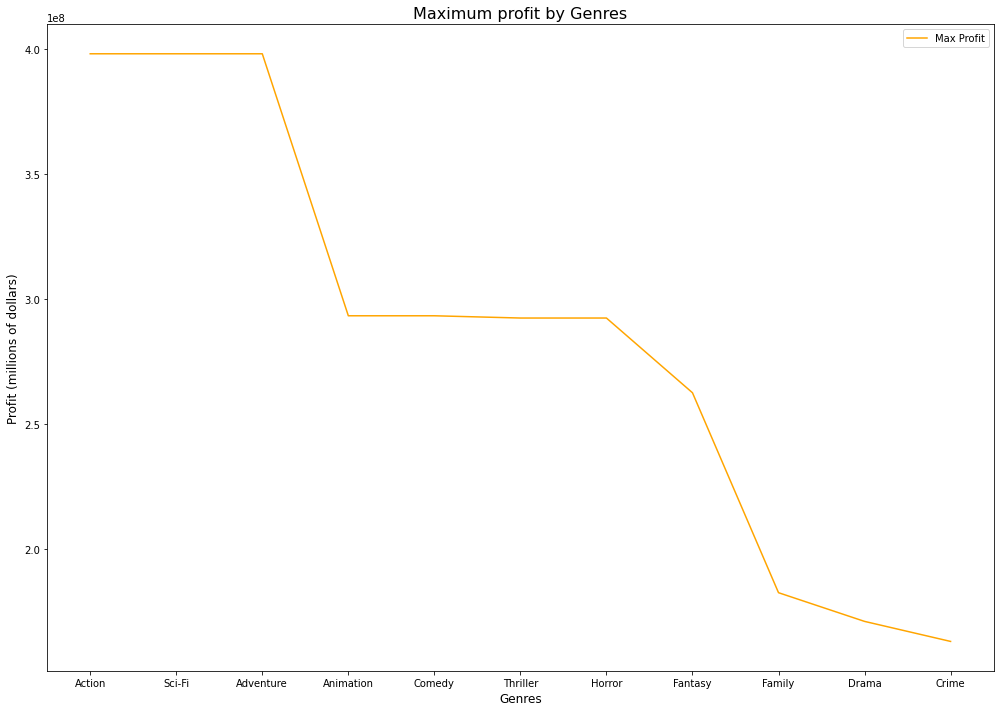

In [534]:
#Line graph showing maximum profit by genres
fig =plt.figure(figsize=(14,10))
graph=sns.lineplot(x= 'genres', y='profit',data=profit_max_df, color = 'orange', label='Max Profit')
fig=graph.get_figure()
graph.set_xlabel(xlabel='Genres', fontsize=12)
graph.set_ylabel(ylabel='Profit (millions of dollars)',fontsize =12)
graph.set_title('Maximum profit by Genres', fontsize=16)
plt.tight_layout()
plt.show()
fig.savefig('MaximumProfitbyGenres.png');

In [535]:
#grouping the dataframe by runtime and profit to get the maximum value of profit by runtime
profit_runtime_df = movies_title_df.groupby(['runtime_minutes'], as_index=False)[['genres','profit']].agg('max').sort_values(by='profit', ascending=False)
profit_runtime_df

,runtime_minutes,profit
82,143.0,398279547.0
26,87.0,293384330.0
74,135.0,292481748.0
37,98.0,292065385.0
80,141.0,262563408.0
...,...,...
112,177.0,NaN
113,180.0,NaN
114,184.0,NaN
115,186.0,NaN


In [536]:
#In order to get the accurate information I went further to look at Top 80 runtime that have profit greater than zero 
profit_runtime_df=profit_runtime_df.iloc[0:80].sort_values('runtime_minutes', ascending=False)
profit_runtime_df[profit_runtime_df['profit'] > 0]

,runtime_minutes,profit
107,169.0,23017894.0
89,150.0,117207973.0
88,149.0,106767189.0
86,147.0,158084349.0
83,144.0,120433663.0
...,...,...
24,85.0,61473115.0
23,84.0,52575175.0
22,83.0,52262945.0
20,81.0,5542576.0


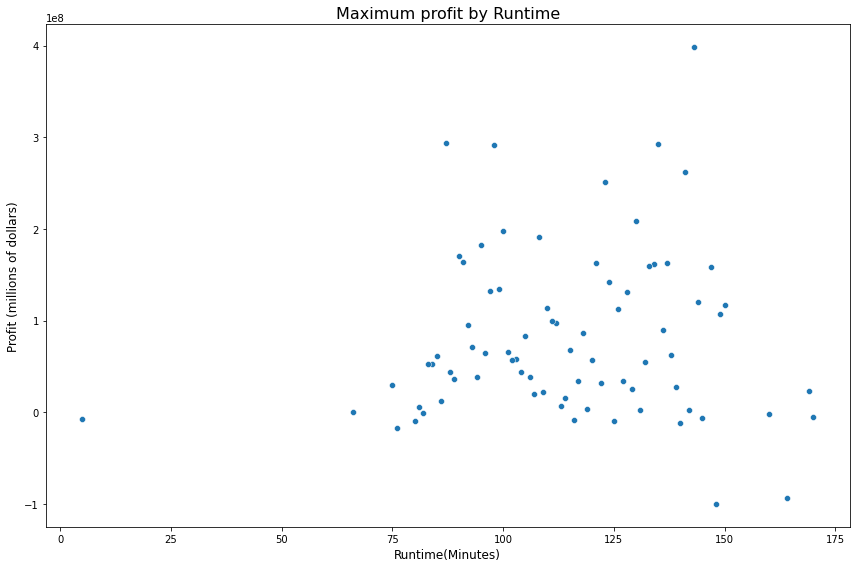

<Figure size 432x288 with 0 Axes>

In [537]:
#scatter plot showing the maximum profit by movies runtime in minutes.
plt.figure(figsize=(12,8))
graph=sns.scatterplot(data=profit_runtime_df, x='runtime_minutes', y='profit')
plt.xlabel(xlabel='Runtime(Minutes)', fontsize=12)
plt.ylabel(ylabel='Profit (millions of dollars)',fontsize =12)
plt.title('Maximum profit by Runtime', fontsize=16)
plt.tight_layout()
plt.show()
plt.savefig('Runtime and Profit.png')

## Conclusion

My recommendation for Microsoft is to look into production budget between $82,000,000 and 91,200,000 which correlates with a very high percentage of Return on Investment.

When choosing genres for the movie, I will suggest for Microsoft to look into the title with Average counts. For example, if you look at Adventure  and Action genres, they have more than average counts and that can yield to high profit and return on Investment.

If Microsoft wishes to produce the best movies to make a higher profit they also need to look into the movie runtime. The average runtime for the top five genres is 102.00 minutes. This need to be considered when producing the movie.

My Analysis shows that 69 percent of the total net profits across all genres come from just the top five  genres which are; Action, Adventure, Sci-Fi, comedy, Animation. I would recommend Microsoft to focus on Action, Adventure and Sci-Fi for high median net profits.

